# S5 Processing

**Structural uncertainty due to fault timing: a multi-model case study from the Perth Basin**<br><br>Bardot, K., Lesueur, M., Siade, A. J., Lang, S. C. and McCallum, J. L. (2024)

routines run


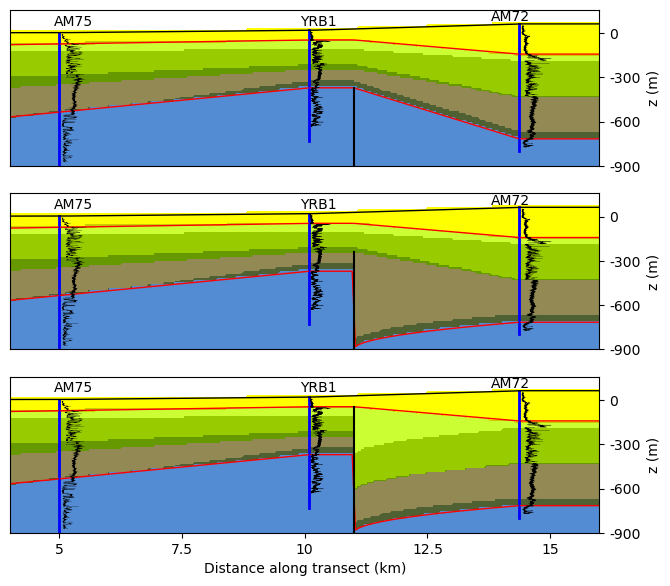

In [1]:
%run ./S3_geology.ipynb

### Import results for base case

In [2]:
pickleoff = open('../results/c_results_mean.pkl','rb')
c_mean = pickle.load(pickleoff)
pickleoff.close()

pickleoff = open('../results/h_results_mean.pkl','rb')
h_mean = pickle.load(pickleoff)
pickleoff.close()

pickleoff = open('../results/times.pkl','rb')
times = pickle.load(pickleoff)
pickleoff.close()

pickleoff = open('../results/dd_results_mean.pkl','rb')
drawdown_all = pickle.load(pickleoff)
pickleoff.close()

pickleoff = open('../results/gwf_all.pkl','rb')
gwf_all = pickle.load(pickleoff)
pickleoff.close()

type(times[0])
time_years = []
for t in times: time_years.append(t/365)
    
c_alltime = np.asarray(c_mean)
c_for_obs = np.moveaxis(c_alltime, 1,-1)

h_alltime = np.array(h_mean)
h_for_obs = np.moveaxis(h_alltime, 1,-1)

### Base Case Results

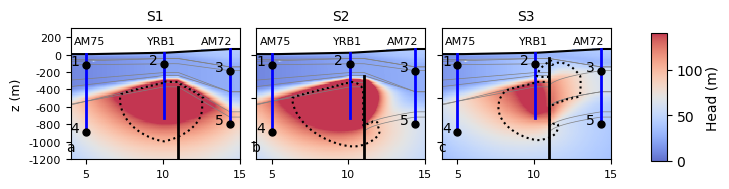

In [3]:
vmin, vmax = 0, 140 
cmap = 'coolwarm'
hstep, kstep = int(ncol/25), int(nlay/25)
levels = [20, 40, 60, 80, 100, 120] # Injection
labels = ['a','b','c']
titles = ['S1', 'S2', 'S3']

fig = plt.figure(figsize=(8,1.7))
for model in range(3):  
    drawdown = drawdown_all[model]
    ax = plt.subplot(1,3,model+1,aspect='auto')
    ax.plot(xc, groundlevel, color = 'black')
    for n in range(nlith): 
        plt.plot(xi,bot_strat_all[model][n], lw = 0.5, c= 'grey')
    xsect = flopy.plot.PlotCrossSection(model=gwf_all[model], line={'Row': 0}, extent = extent)
    csa = xsect.plot_array(drawdown, masked_values=[0], cmap = cmap, alpha=0.8, vmin = vmin, vmax = vmax) 
    ax.plot([AM75.x, AM75.x],[AM75.ground, AM75.jy], color = 'blue', lw = 2.)
    ax.plot([YMB1.x, YMB1.x],[YMB1.ground, YMB1.jy], color = 'blue', lw = 2.)
    ax.plot([AM72.x, AM72.x],[AM72.ground, AM72.jy], color = 'blue', lw = 2.)
    ax.plot([fault_x, fault_x],[zmin, fault_top_all[model]], lw = 2., color='black')
    ax.set_title(titles[model], size = 10)
    ax.set_ylim([-1200, zmax+200])
    ax.set_xlim([4000, 15000])
    if model > 0: ax.set(yticklabels=[])
    if model == 0: ax.set_ylabel('z (m)', size = 10)
    for j in range(5):
        ax.plot(obs_coords[j][0], obs_coords[j][1], 'o', ms = 5, color = 'black')
        ax.annotate(j+1,(obs_coords[j][0]-1000,obs_coords[j][1]), size = 10)

    array = c_mean[model,-1,:,0,:]
    array[array == 1e30] = 0.
    levels = [5] 
    CS = ax.contour(X, Z, array, levels,colors='Black', linewidths=1.5, linestyles = 'dotted')
    if i == 1: ax.set_xlabel('x (km)', size = 10)
    ax.set_xticks([5000, 10000, 15000])
    ax.set_xticklabels(labels = [5, 10, 15], size = 8)
    if model > 0: ax.set(yticklabels=[])
    if model == 0: 
        ax.set_ylabel('z (m)', size = 9)
        ax.set_yticks([-1200,-1000,-800, -600, -400, -200, 0, 200])
        ax.set_yticklabels(labels = [-1200,-1000,-800, -600, -400, -200, 0, 200], size = 8)
    ax.annotate(labels[model], (4000, -1100), size = 10, ha='center')
    ax.annotate("AM75",(4200, AM75.ground+120), size = 8)#, bbox=dict(facecolor = 'white'))
    ax.annotate("YRB1",(9000, AM75.ground+120), size = 8)#, bbox=dict(facecolor = 'white'))
    ax.annotate("AM72",(12500, AM75.ground+120), size = 8)#, bbox=dict(facecolor = 'white'))
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.75]) # left, bot, width, height
cbar = fig.colorbar(csa, cax=cbar_ax)
cbar.set_label('Head (m)', rotation=90, labelpad = 2)

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

fig.savefig('../figures/fig5.tif', dpi=300)

### Head-Time plots

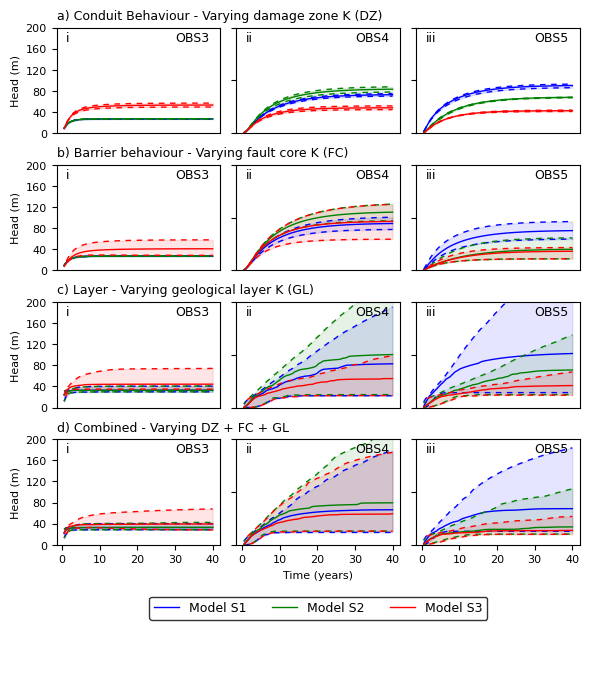

In [4]:
scenarios = ['con', 'bar', 'lay', 'all'] 

labels = ['a) Conduit Behaviour - Varying damage zone K (DZ)',
          'b) Barrier behaviour - Varying fault core K (FC)',
          'c) Layer - Varying geological layer K (GL)',
          'd) Combined - Varying DZ + FC + GL']
 
sublabels = ['i', 'ii', 'iii']
colors_line = ['b','g','r']
alpha = [0.2, 0.6, 1.0]
linestyles = [(0, (4, 4)), (2, (4,4)), (4, (4, 4))]

t = []
for x in range(80): t.append(time_years[x]*9)
t = time_years 
    
fig = plt.figure(figsize=[6.75, 8.5])
    
for i, scenario in enumerate(scenarios):
        
    pickleoff = open('../results/c_results_' + scenario + '.pkl','rb')
    c_load = pickle.load(pickleoff)
    pickleoff.close()
    c_results = c_load #3, 30, 150, 1, 300
    
    pickleoff = open('../results/h_results_' + scenario + '.pkl','rb')
    h_load = pickle.load(pickleoff)
    pickleoff.close()
    h_results = h_load #3, 30, 150, 1, 300

    pickleoff = open('../results/obs_results_' + scenario + '.pkl','rb')
    obs_load = pickle.load(pickleoff)
    pickleoff.close()
    obs_results = np.array(obs_load) # 3, 30, 5, 721    # (313, 100, 5, 80)
    
    for k, obs in enumerate([2,3,4]): 
    
        for model in range(3):

            j = 3 * i + k + 1        
            ax = plt.subplot(5,3,j)#aspect='auto')  

            stacked = np.swapaxes(obs_results, 1, 2)    #obs_results[m][r][i] --> obs_results[m][i][r]   
            p10 = np.nanpercentile(stacked[model][obs], 10, axis=0) 
            p50 = np.nanpercentile(stacked[model][obs], 50, axis=0) 
            p90 = np.nanpercentile(stacked[model][obs], 90, axis=0) 
            ax.plot(t, p10, lw = 1., ls = linestyles[model], color = colors_line[model])
            ax.plot(t, p50, lw = 1.,                         color = colors_line[model])
            ax.plot(t, p90, lw = 1., ls = linestyles[model], color = colors_line[model])
            ax.fill_between(t, p10, p90, color = colors_line[model], alpha = 0.1)
          
            ax.set_ylim([0, 200])

            if j == 11: ax.set_xlabel('Time (years)', size = 8)
            if j <=9: ax.set_xticks([])
            if j > 9: 
                ax.set_xticks([0,10,20,30,40])
                ax.set_xticklabels(labels = [0,10,20,30,40], size = 8)
            if k == 0: 
                ax.set_ylabel('Head (m)', size = 8)
                ax.set_yticks([0, 40, 80, 120, 160, 200])
                ax.set_yticklabels(labels = [0 ,40, 80, 120, 160, 200], size = 8)
            if k > 0: ax.set(yticklabels=[])
            if k == 0: ax.set_title(labels[i], size = 9, loc = 'left' )
        ax.annotate(sublabels[k], (1, 175), size = 9)
        ax.annotate('OBS%i' %(obs+1), (30, 175), size = 9)


ax = plt.subplot(5,1,5)
ax.axis('off')

legend = ['Model S1', 'Model S2', 'Model S3']
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors_line[0], lw=1.),
                Line2D([0], [0], color=colors_line[1], lw=1.),
                Line2D([0], [0], color=colors_line[2], lw=1.)]
plt.legend(custom_lines, legend, loc="center", fontsize = 9, ncols = 3, edgecolor = 'black', bbox_to_anchor=[0.5, 0.7])

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

fig.savefig('../figures/fig7.tif', dpi=300)

### For Supporting Information (ALL Head-Time plots)

C:\Users\19904604\AppData\Local\Temp\ipykernel_29828\2836148153.py:58: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5,1,5)


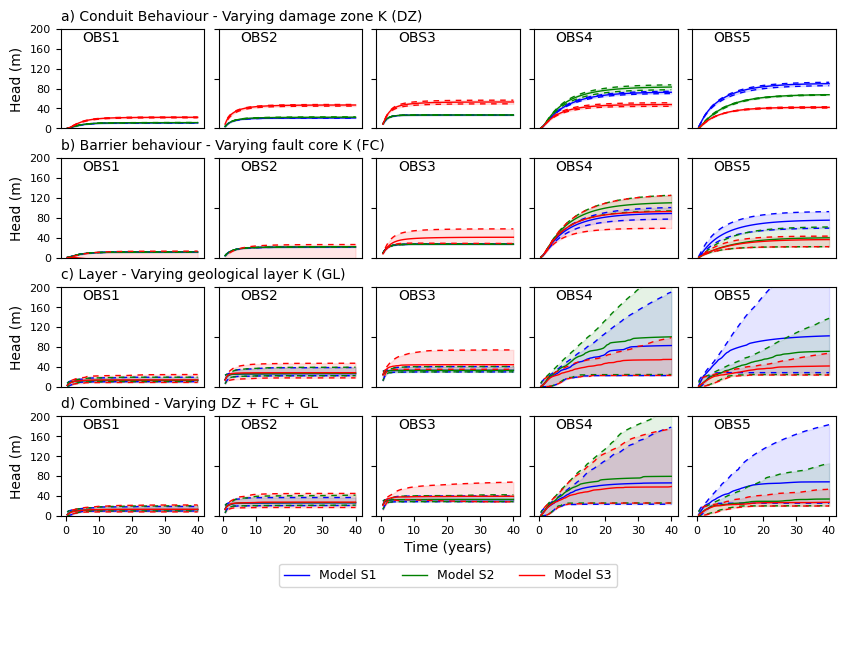

<Figure size 640x480 with 0 Axes>

In [5]:
scenarios = ['con', 'bar', 'lay', 'all'] 

colors_line = ['b','g','r']
alpha = [0.2, 0.6, 1.0]
linestyles = [(0, (4, 4)), (2, (4,4)), (4, (4, 4))]

t = []
for x in range(80): t.append(time_years[x]*9)
t = time_years 
    
fig, ax = plt.subplots(5, 5, figsize=[10, 8])
    
for i, scenario in enumerate(scenarios):

    pickleoff = open('../results/c_results_' + scenario + '.pkl','rb')
    c_load = pickle.load(pickleoff)
    pickleoff.close()
    c_results = c_load #3, 30, 150, 1, 300
    
    pickleoff = open('../results/h_results_' + scenario + '.pkl','rb')
    h_load = pickle.load(pickleoff)
    pickleoff.close()
    h_results = h_load #3, 30, 150, 1, 300

    pickleoff = open('../results/obs_results_' + scenario + '.pkl','rb')
    obs_load = pickle.load(pickleoff)
    pickleoff.close()
    obs_results = np.array(obs_load) # 3, 30, 5, 721    # (313, 100, 5, 80)
    
    for obs in range(5): 
        j = 5 * i + obs + 1   
        ax = plt.subplot(5,5,j)#aspect='auto')  
        ax.set_ylim([0, 200])
        ax.annotate('OBS%i' %(obs+1), (5, 175), size = 10)

        if j == 18: ax.set_xlabel('Time (years)', size = 10)
        if j <= 15: ax.set_xticks([])
        if j > 15: 
            ax.set_xticks([0,10,20,30,40])
            ax.set_xticklabels(labels = [0,10,20,30,40], size = 8)
        if obs == 0: 
            ax.set_ylabel('Head (m)', size = 10)
            ax.set_yticks([0, 40, 80, 120, 160, 200])
            ax.set_yticklabels(labels = [0 ,40, 80, 120, 160, 200], size = 8)
        if obs > 0: ax.set(yticklabels=[])
        if obs == 0: ax.set_title(labels[i], size = 10, loc = 'left' )
    
        for model in range(3):
            stacked = np.swapaxes(obs_results, 1, 2)    #obs_results[m][r][i] --> obs_results[m][i][r]   
            p10 = np.nanpercentile(stacked[model][obs], 10, axis=0) 
            p50 = np.nanpercentile(stacked[model][obs], 50, axis=0) 
            p90 = np.nanpercentile(stacked[model][obs], 90, axis=0) 
            ax.plot(t, p10, lw = 1., ls = linestyles[model], color = colors_line[model])
            ax.plot(t, p50, lw = 1.,                         color = colors_line[model])
            ax.plot(t, p90, lw = 1., ls = linestyles[model], color = colors_line[model])
            ax.fill_between(t, p10, p90, color = colors_line[model], alpha = 0.1)

ax = plt.subplot(5,1,5)
ax.axis('off')
legend = ['Model S1', 'Model S2', 'Model S3']
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors_line[0], lw=1.),
                Line2D([0], [0], color=colors_line[1], lw=1.),
                Line2D([0], [0], color=colors_line[2], lw=1.)]
plt.legend(custom_lines, legend, loc="center", fontsize = 9, ncols = 3, bbox_to_anchor=[0.5, 0.7])

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()
plt.subplots_adjust(wspace=0.2, hspace=0.3)

figname = '../figures/fig7_supporting.tif'
plt.savefig(figname, dpi=300)

### Probability zones - concentration

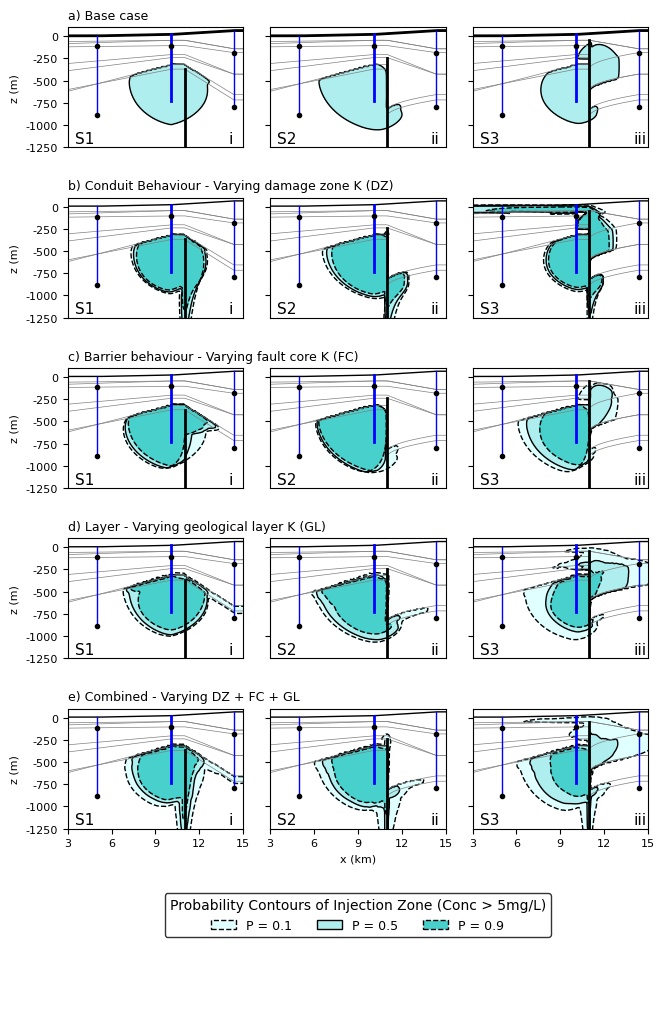

In [6]:
scenarios = ['mean','con', 'bar', 'lay', 'all'] 
labels = ['a) Base case',
          'b) Conduit Behaviour - Varying damage zone K (DZ)',
          'c) Barrier behaviour - Varying fault core K (FC)',
          'd) Layer - Varying geological layer K (GL)',
          'e) Combined - Varying DZ + FC + GL']
sublabels = ['i', 'ii', 'iii']
colors = ['lightcyan', 'paleturquoise','mediumturquoise']#'lightblue', 'lightsteelblue']#'skyblue']#'lightsteelblue']
fig = plt.figure(figsize=[6.75, 10.2])
#fig.suptitle('Probability Contours of Injection Zone (Conc > 5mg/L)', size = 10)
levels = [5,110] # COntour plots for conc = 5 (injection conc = 100)

for i, scenario in enumerate(scenarios):
       
    pickleoff = open('../results/c_results_' + scenario + '.pkl','rb')
    c_load = pickle.load(pickleoff)
    pickleoff.close()
    c_results = c_load #3, 30, 150, 1, 300
    
    for model in range(3):
        j = 3 * i + model + 1
        ax = plt.subplot(6,3,j)#aspect='auto')  
     
        if scenario == 'mean':
            
            array = c_mean[model][-1][:,0,:]
            array[array == 1e30] = 0.
            ax.plot(xc, groundlevel, color = 'black', lw = 2.)
            ax.contourf(X, Z, array, levels, colors = colors[1])
            ax.contour(X, Z, array, levels, colors = 'Black', linewidths=1., linestyles = 'solid')
    
        else:
            
            stacked = np.array(c_results[model]) # stacked = (20, 150, 1, 150)
            median = np.median(stacked, axis = 0) 
            ten_pc = np.percentile(stacked, 10, axis=0)
            ninety_pc = np.percentile(stacked, 90, axis=0)
            P90 = ax.contourf(X, Z, ninety_pc[:,0,:], levels, colors = colors[0])
            P50 = ax.contourf(X, Z, median[:,0,:], levels, colors = colors[1])
            P10 = ax.contourf(X, Z, ten_pc[:,0,:], levels, colors = colors[2])
            
            ax.contour(X, Z, median[:,0,:], levels, colors = 'Black', linewidths=1., linestyles = 'solid')
            ax.contour(X, Z, ten_pc[:,0,:], levels, colors = 'Black', linewidths=1., linestyles = 'dashed')
            ax.contour(X, Z, ninety_pc[:,0,:], levels, colors = 'Black', linewidths=1., linestyles = 'dashed')
        
        ax.plot(xc, groundlevel, color = 'black', lw = 1)
        for n in range(nlith): ax.plot(xi,bot_strat_all[model][n], lw = 0.5, c= 'grey')
        ax.plot([YMB1.x, YMB1.x],[YMB1.ground, YMB1.jy], color = 'blue', lw = 2.)
        ax.plot([fault_x, fault_x],[zmin, fault_top_all[model]], color='black', lw = 2.)
        
        if j == 14: ax.set_xlabel('x (km)', size = 8)
        ax.set_xlim([3000, 15000])
        if j <=12: ax.set_xticks([])
        if j > 12: 
            ax.set_xticks([3000, 6000, 9000, 12000, 15000])
            ax.set_xticklabels(labels = [3, 6, 9, 12, 15], size = 8)
        ax.set_ylim([-1250, 100])
        if model == 0: 
            ax.set_ylabel('z (m)', size = 8)
            ax.set_yticks([-1250, -1000,-750, -500, -250, 0])
            ax.set_yticklabels(labels = [-1250, -1000,-750, -500, -250, 0], size = 8)
        if model > 0: ax.set(yticklabels=[])
        if model == 0: ax.set_title(labels[i], size = 9, loc = 'left' )
        ax.annotate(sublabels[model], (14000, -1200), size = 11)
        ax.annotate('S%i' %(model+1), (3500, -1200), size =11)
        
        ax.plot([AM75.x, AM75.x],[AM75.ground, AM75.jy], color = 'blue', lw = 1.)
        ax.plot([AM72.x, AM72.x],[AM72.ground, AM72.jy], color = 'blue', lw = 1.)
        for ob in range(5):
            ax.plot(obs_coords[ob][0], obs_coords[ob][1], 'o', ms = 3, color = 'black')

ax = plt.subplot(6,1,6)
ax.axis('off')
#legend = ['Model S1', 'Model S2', 'Model S3']
import matplotlib.patches as mpatches
p10_patch = mpatches.Patch(facecolor = colors[0], edgecolor='black', linestyle='dashed', label='P = 0.1')
p50_patch = mpatches.Patch(facecolor = colors[1], edgecolor='black', linestyle='solid', label='P = 0.5')
p90_patch = mpatches.Patch(facecolor = colors[2], edgecolor='black', linestyle='dashed', label='P = 0.9')
ax.legend(handles=[p10_patch, p50_patch, p90_patch], loc="center", fontsize = 9, ncols = 3, edgecolor = 'black',
          bbox_to_anchor=[0.5, 0.7], title = 'Probability Contours of Injection Zone (Conc > 5mg/L)')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.tight_layout()

figname = '../figures/fig6.tif'
plt.savefig(figname, dpi=300)